In [1]:
from PIL import Image
import os.path
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def get_data():
    X=[]
    y=[]
    filelist = os.listdir('./celeba/img')
    labels = pd.read_csv('./celeba/labels.csv',delimiter = '\t')
    for item in filelist:
        path = os.path.join('./celeba/img',item)
        img=Image.open(path)  
        img = img.resize((64,64), Image.BILINEAR)
        img = img.convert('L')
        img = np.resize(img,64*64)
        X.append(np.array(img)/255.)
        y.append(labels['gender'][int(item.split('.')[0])])
    y = np.array(y)
    Y = np.array((y+1)/2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=0)

    return x_train, x_test, y_train, y_test, X, Y

In [3]:
x_train, x_test, y_train, y_test, X, Y = get_data()

In [4]:
max_iter = np.arange(10,201,10)
test_acc =[]
train_acc=[]
for iter_ in max_iter:
    logreg = LogisticRegression(penalty='l1',solver='liblinear',C=0.62,max_iter = iter_)
    logreg.fit(x_train, y_train)
    yTest_pred= logreg.predict(x_test)
    yTrain_pred = logreg.predict(x_train)
    test_acc.append(accuracy_score(y_test,yTest_pred)) 
    train_acc.append(accuracy_score(y_train,yTrain_pred))

C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


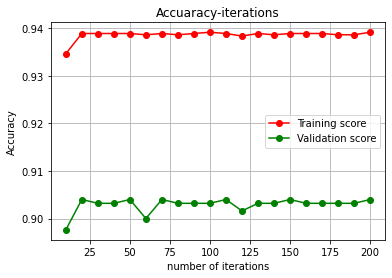

In [5]:
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuaracy-iterations')
plt.plot(max_iter, train_acc, 'o-', color="r",label="Training score")
plt.plot(max_iter, test_acc, 'o-', color="g",label="Validation score")
plt.legend(loc="best")

In [6]:
scores = cross_val_score(logreg, X ,Y, cv=5)
print(scores)
print(scores.mean())

[0.899 0.901 0.894 0.878 0.897]
0.8938
